In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [82]:
data = np.load('data.npz')

In [83]:
dat.files

['data_sort', 'data_del', 'data_add', 'data_final']

In [84]:
data_final = dat['data_final']

locs = np.c_[data_final.T[0], data_final.T[1]]
rents = data_final.T[2]
print(locs.shape)
print(rents.shape)

(158, 2)
(158,)


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(criterion='squared_error', random_state=0, max_depth=3, min_samples_leaf=5, min_impurity_decrease=1)#, max_leaf_nodes=6)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 3543, 118)
locs_y_test = np.linspace(0, 5315, 177)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

[Text(0.4444444444444444, 0.875, 'X[0] <= 1474.127\nsquared_error = 65.685\nsamples = 158\nvalue = 24.198'),
 Text(0.2222222222222222, 0.625, 'X[1] <= 2576.004\nsquared_error = 41.364\nsamples = 75\nvalue = 18.742'),
 Text(0.1111111111111111, 0.375, 'squared_error = 13.142\nsamples = 39\nvalue = 16.456'),
 Text(0.3333333333333333, 0.375, 'X[1] <= 3123.764\nsquared_error = 60.149\nsamples = 36\nvalue = 21.218'),
 Text(0.2222222222222222, 0.125, 'squared_error = 49.1\nsamples = 10\nvalue = 29.731'),
 Text(0.4444444444444444, 0.125, 'squared_error = 25.8\nsamples = 26\nvalue = 17.943'),
 Text(0.6666666666666666, 0.625, 'X[1] <= 1587.216\nsquared_error = 36.453\nsamples = 83\nvalue = 29.129'),
 Text(0.5555555555555556, 0.375, 'squared_error = 6.124\nsamples = 22\nvalue = 24.079'),
 Text(0.7777777777777778, 0.375, 'X[1] <= 3996.119\nsquared_error = 34.878\nsamples = 61\nvalue = 30.95'),
 Text(0.6666666666666666, 0.125, 'squared_error = 42.583\nsamples = 37\nvalue = 33.035'),
 Text(0.8888888

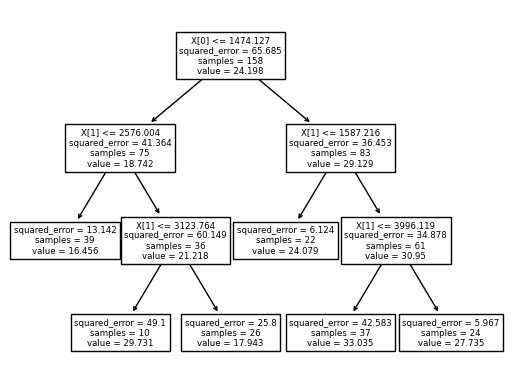

In [86]:
tree.plot_tree(model)

In [87]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data_final.tolist()))
print(img.shape)
mietdaten = np.copy(data_final)
mietdaten[:,0] = data_final[:,0]/img.shape[1]*100
mietdaten[:,1] = data_final[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(5315, 3543, 3)


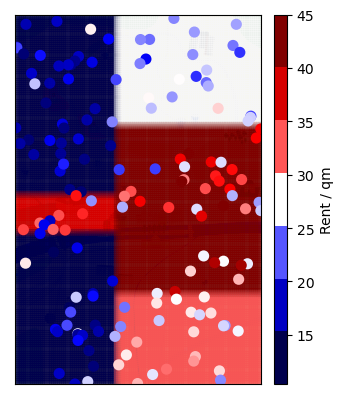

In [88]:
# Does not work properly

import matplotlib

img = plt.imread("../assets/map.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None